<a href="https://colab.research.google.com/github/010shivam/Titanic-ML/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
print('All Done')

All Done


In [2]:
# Seaborn and Matplotlib Settings
# sns.set_style('whitegrid')
sns.set(font="sans serif", style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False},palette="mako")

In [3]:
# Datasets
titanic = pd.read_csv('https://raw.githubusercontent.com/010shivam/Titanic-ML/refs/heads/main/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset Overview
row,columns = titanic.shape
print(f'The dataset has {row} rows and {columns} columns \n')
titanic.describe()

The dataset has 891 rows and 12 columns 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic["Age"]=titanic['Age'].fillna(titanic['Age'].mean())
titanic["Emabrked"] =titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

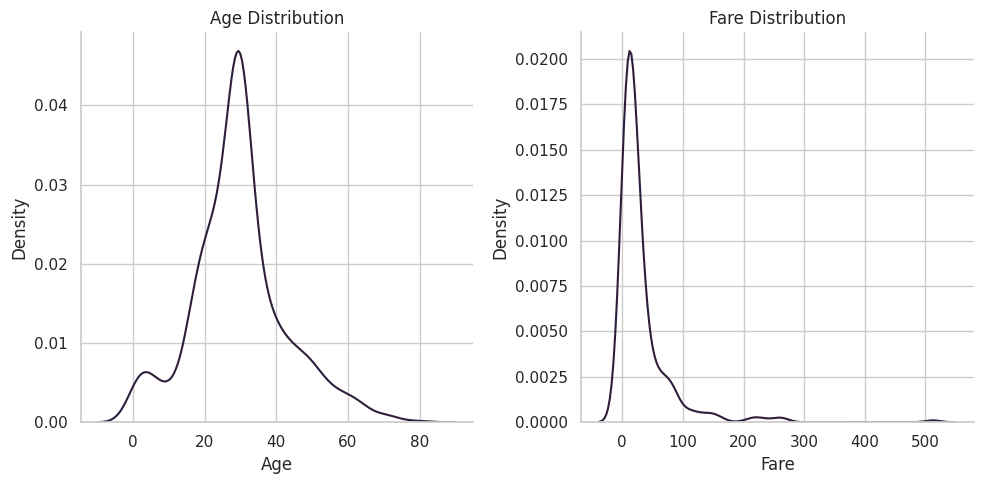

In [6]:
fig,axes =plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(titanic['Age'],ax=axes[0])
axes[0].set_title('Age Distribution')
sns.kdeplot(titanic['Fare'],ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.tight_layout()

##Age vs. Survival
Q1: Is the average age of survivors different from non-survivors?

- H₀: The mean age of survivors and non-survivors is the same.
- H₁: The mean age of survivors and non-survivors is different.

          count       mean        std   min   25%        50%   75%   max
Survived                                                                
0         549.0  30.415100  12.457370  1.00  23.0  29.699118  35.0  74.0
1         342.0  28.549778  13.772498  0.42  21.0  29.699118  35.0  80.0


<Axes: xlabel='Age', ylabel='Density'>

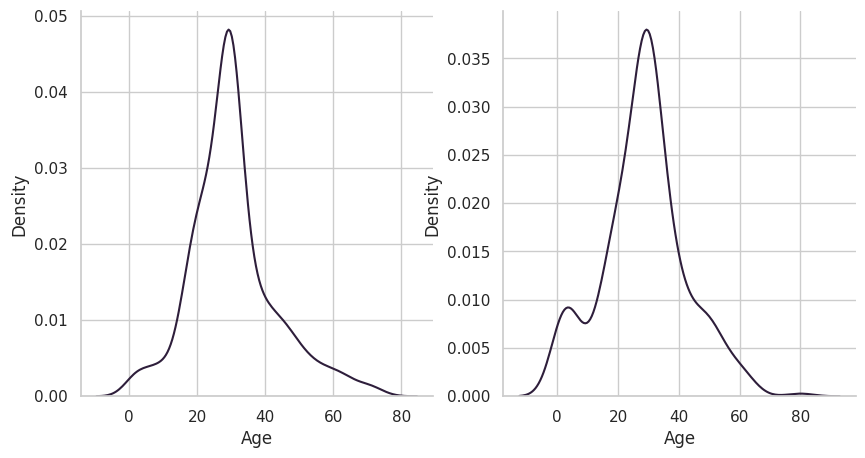

In [7]:
df =titanic.groupby("Survived")["Age"]
print(df.describe())
fig,axes =plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(df.get_group(0),label="Non-Survived",ax=axes[0])
sns.kdeplot(df.get_group(1),label="Survived",ax=axes[1])

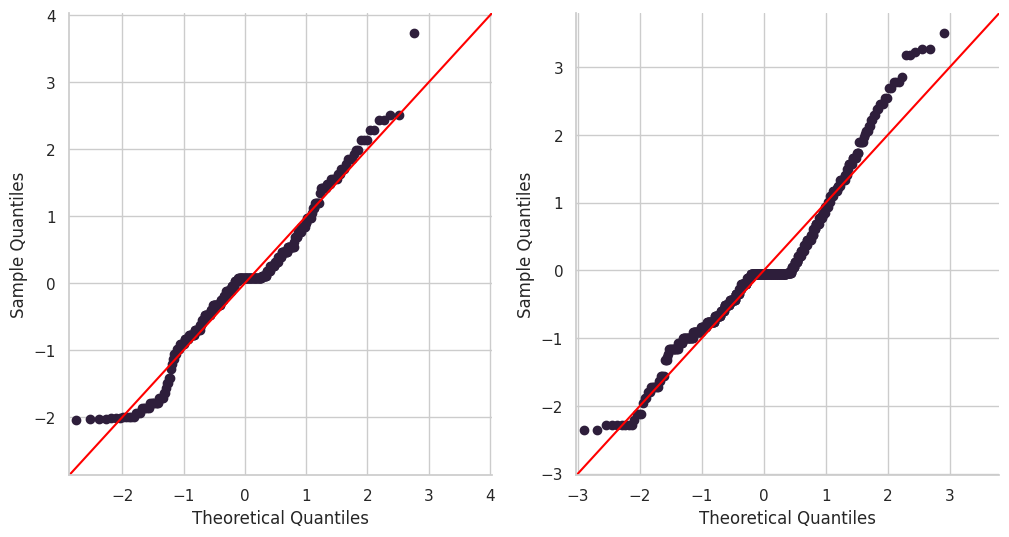

In [8]:
fig,ax =plt.subplots(1,2,figsize=(12,6))

sm.qqplot(df.get_group(1),stats.norm,fit=True,line='45',ax=ax[0])
sm.qqplot(df.get_group(0),stats.norm,fit=True,line='45',ax=ax[1])
plt.show()

In [9]:
stats.ttest_ind(df.get_group(0),df.get_group(1),equal_var=False)

TtestResult(statistic=2.0385172031950463, pvalue=0.04189090646311582, df=669.0264242341432)

AS, P value for the test is < 0.5 hence we reject the null hypothesis, but the results isnt strong

##Q: Does gender significantly affect survival rate?

- H₀ (Null Hypothesis): Survival rates for males and females are the same.
- H₁ (Alternative Hypothesis): Survival rates for males and females are different.

Test: Chi-square test (for categorical data)

In [10]:
titanic.groupby(["Sex","Survived"])["PassengerId"].count()
table =pd.crosstab(titanic["Sex"],titanic["Survived"])


In [11]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

The p value << 0.05 gives significant prove that surviaval rate is biase towards gender due to womens first poliy

##Q: Do higher-class passengers have a better survival rate?

- H₀: Survival rates are equal across all passenger classes.
- H₁: At least one class has a significantly different survival rate.
Test: Chi-square test

In [12]:
table2 =pd.crosstab(titanic["Survived"],titanic["Pclass"])
table2

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [13]:
stats.chi2_contingency(table2)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

Hence p value suggest that survival was dependant on classs , more of 3 class people died

###Q: Did passengers from different embarkation ports pay different fares?

- H₀: There is no difference in average fare among embarkation ports.
- H₁: At least one embarkation port has a significantly different average fare.
Test: One-way ANOVA

          count       mean        std     min       25%    50%        75%  \
Embarked                                                                    
C         168.0  59.954144  83.912994  4.0125  13.69795  29.70  78.500025   
Q          77.0  13.276030  14.188047  6.7500   7.75000   7.75  15.500000   
S         644.0  27.079812  35.887993  0.0000   8.05000  13.00  27.900000   

               max  
Embarked            
C         512.3292  
Q          90.0000  
S         263.0000  


<Axes: xlabel='Embarked', ylabel='Fare'>

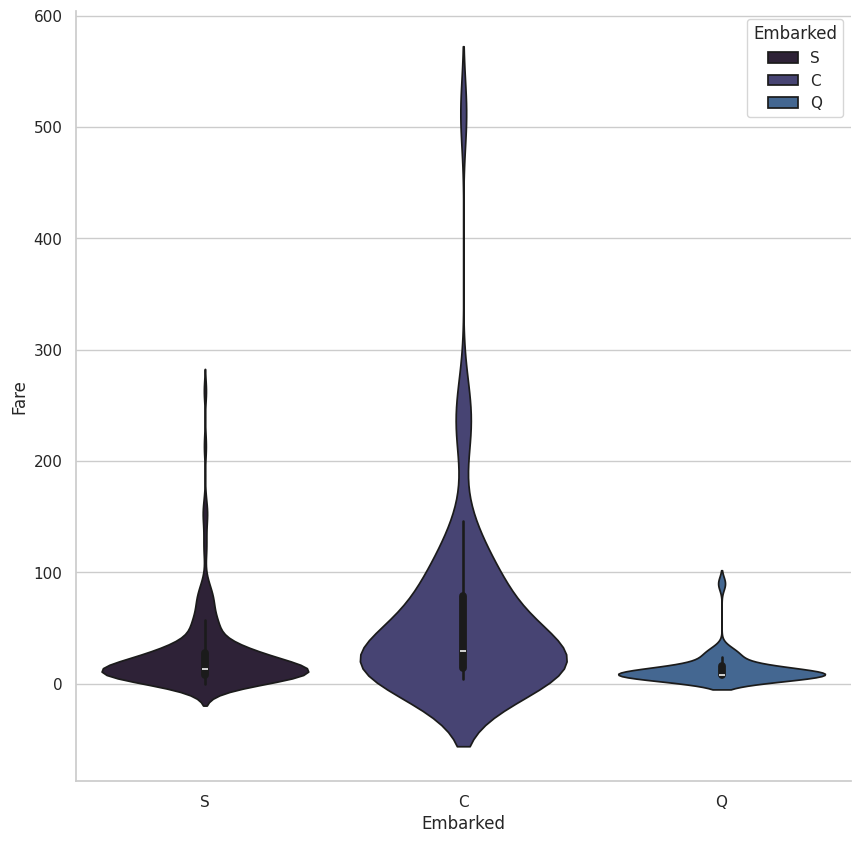

In [14]:
titanic.groupby(["Embarked"])["Fare"]
print(titanic.groupby(["Embarked"])["Fare"].describe())
fig,ax= plt.subplots(figsize =(10,10))
sns.violinplot(y='Fare',x="Embarked",data=titanic,hue="Embarked")

In [15]:
S = titanic[titanic["Embarked"]=="S"]
C = titanic[titanic["Embarked"]=="C"]
Q = titanic[titanic["Embarked"]=="Q"]
stats.f_oneway(S["Fare"],C["Fare"],Q["Fare"])


F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(titanic["Fare"], titanic["Emabrked"])
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     C      Q -46.6781    0.0 -62.1063 -31.2499   True
     C      S -32.7105    0.0 -42.4195 -23.0015   True
     Q      S  13.9676 0.0409   0.4519  27.4834   True
------------------------------------------------------


Hence we conclude that there is the significant difference in the fair price